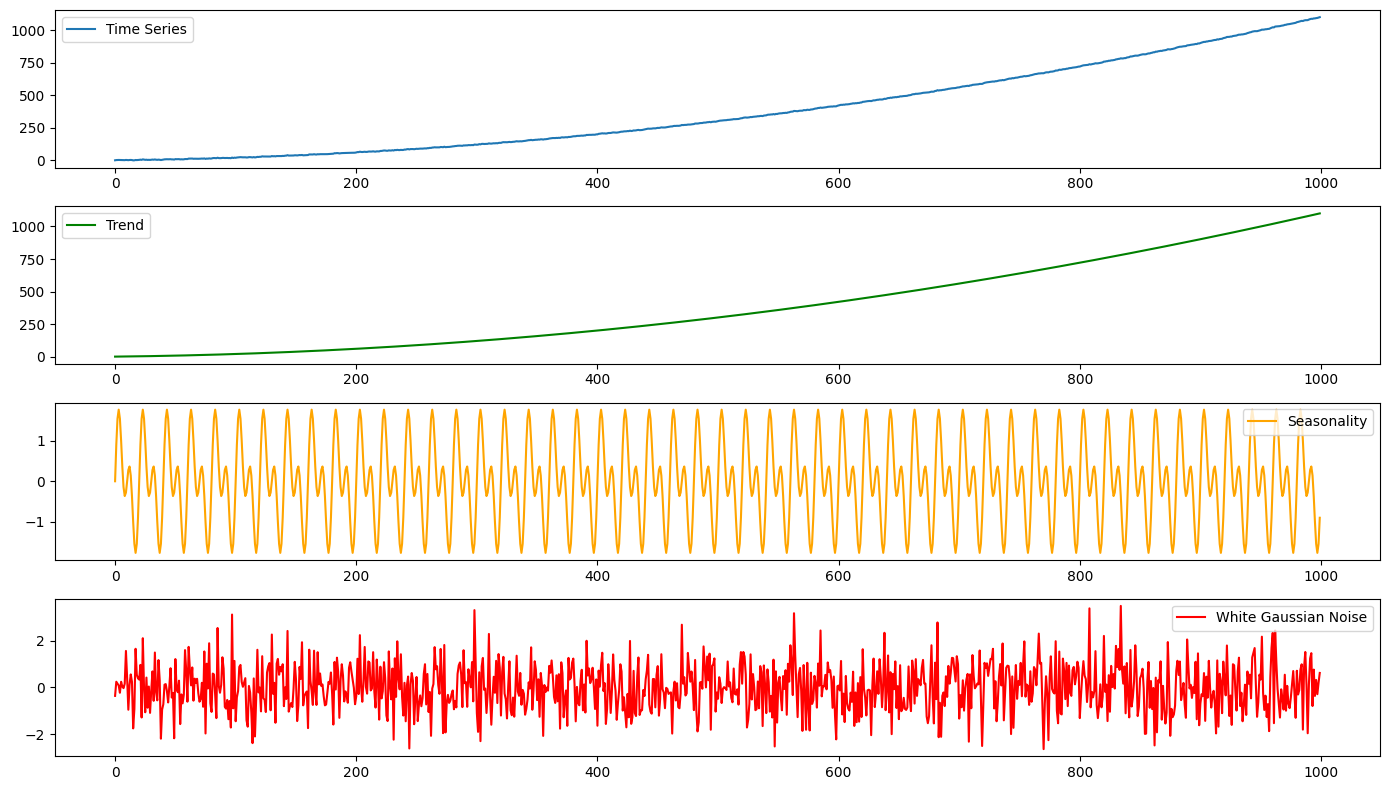

In [6]:
#ex 1
import numpy as np
import matplotlib.pyplot as plt

N = 1000
t = np.arange(N)

# Componenta Trend - ecuație de gradul 2
a, b, c = 0.001, 0.1, 2
trend = a * t**2 + b * t + c

# Componenta Sezon - două frecvențe
freq1, freq2 = 0.05, 0.1
season = np.sin(2 * np.pi * freq1 * t) + np.sin(2 * np.pi * freq2 * t)

# Componenta Variații Mici - zgomot alb gaussian
noise = np.random.normal(0, 1, N)

# Suma componentelor
time_series = trend + season + noise

# Crearea și afișarea graficelor
plt.figure(figsize=(14, 8))

plt.subplot(4, 1, 1)
plt.plot(time_series, label="Time Series")
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(trend, label="Trend", color="green")
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(season, label="Seasonality", color="orange")
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(noise, label="White Gaussian Noise", color="red")
plt.legend()

plt.tight_layout()
plt.show()

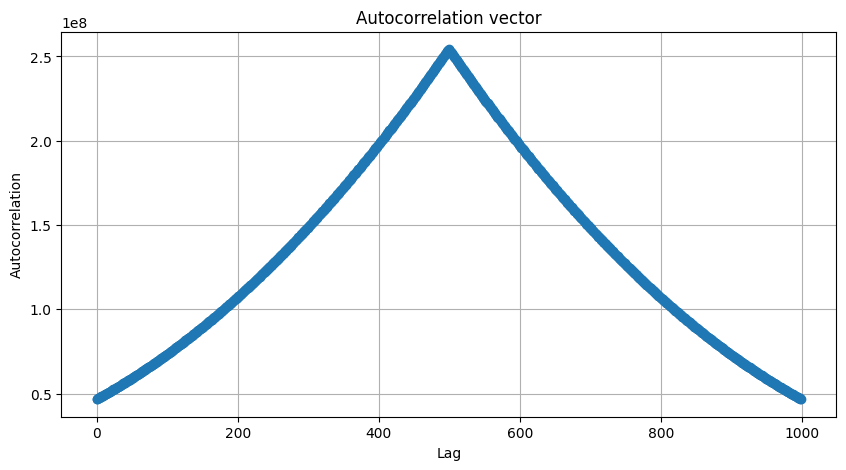

In [14]:
#ex 2

# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf

# Generating a time series
N = 1000
t = np.arange(N)

# Quadratic trend
a, b, c = 0.001, 0.1, 2
trend = a * t**2 + b * t + c

# Seasonality with two frequencies
freq1, freq2 = 0.05, 0.1
season = np.sin(2 * np.pi * freq1 * t) + np.sin(2 * np.pi * freq2 * t)

# White Gaussian noise
noise = np.random.normal(0, 1, N)

# Sum of components
time_series = trend + season + noise

# Calculating the autocorrelation vector
autocorrelation = np.correlate(time_series, time_series, mode = 'same')
autocorrelation = autocorrelation[1:]

# Plotting the autocorrelation vector
plt.figure(figsize=(10, 5))
plt.plot(autocorrelation, marker='o')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation vector')
plt.grid(True)
plt.show()


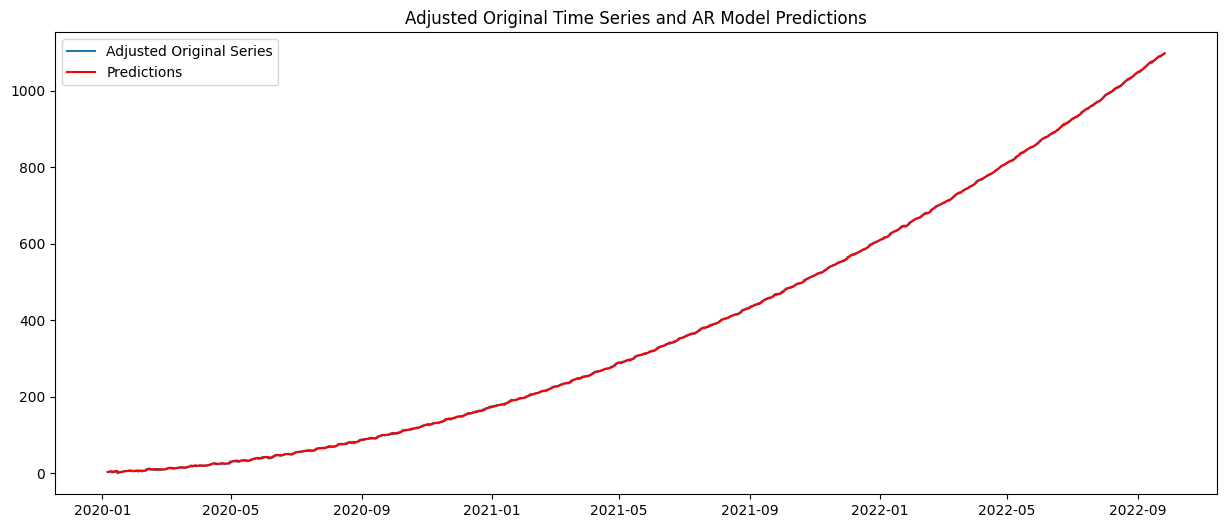

In [15]:
#ex 3

# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.stattools import acf

# Generating a time series
N = 1000
t = np.arange(N)

# Quadratic trend
a, b, c = 0.001, 0.1, 2
trend = a * t**2 + b * t + c

# Seasonality with two frequencies
freq1, freq2 = 0.05, 0.1
season = np.sin(2 * np.pi * freq1 * t) + np.sin(2 * np.pi * freq2 * t)

# White Gaussian noise
noise = np.random.normal(0, 1, N)

# Sum of components
time_series = trend + season + noise

# Choosing the order of the AR model (p)
p = 5  # Example value, can be adjusted

# Fitting the AR model
ar_model = AutoReg(time_series, lags=p).fit()

# Making predictions
predictions = ar_model.predict(start=p, end=len(time_series)-1, dynamic=False)

# Creating a time series index
time_index = pd.date_range(start='2020-01-01', periods=N, freq='D')

# Adjusting the original time series to match the length of predictions
adjusted_original = time_series[p:]

# Creating a new DataFrame for adjusted original series and predictions
df_adjusted = pd.DataFrame({'Adjusted Original': adjusted_original, 'Prediction': predictions}, index=time_index[p:])

# Plotting the adjusted original series and predictions
plt.figure(figsize=(15, 6))
plt.plot(df_adjusted['Adjusted Original'], label='Adjusted Original Series')
plt.plot(df_adjusted['Prediction'], label='Predictions', color='red')
plt.legend()
plt.title('Adjusted Original Time Series and AR Model Predictions')
plt.show()

In [18]:
#ex 4
!pip install scikit-learn

import numpy as np
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error

N = 1000
t = np.arange(N)
a, b, c = 0.001, 0.1, 2
trend = a * t**2 + b * t + c
freq1, freq2 = 0.05, 0.1
season = np.sin(2 * np.pi * freq1 * t) + np.sin(2 * np.pi * freq2 * t)
noise = np.random.normal(0, 1, N)
time_series = trend + season + noise

train_size = int(len(time_series) * 0.8)
train, test = time_series[:train_size], time_series[train_size:]

p_values = range(1, 10)
m_values = range(1, 5)

best_score, best_cfg = float("inf"), None

for p in p_values:
    for m in m_values:
        try:
            model = AutoReg(train, lags=p).fit()
            predictions = model.predict(start=len(train), end=len(train)+m-1, dynamic=False)
            actual = test[:m]
            error = mean_squared_error(actual, predictions)
            if error < best_score:
                best_score, best_cfg = error, (p, m)
            print(f'AR({p}) with horizon {m} - MSE: {error}')
        except:
            continue

print(f'Best AR(p) with horizon m: {best_cfg} with MSE: {best_score}')

AR(1) with horizon 1 - MSE: 0.15475206105323436
AR(1) with horizon 2 - MSE: 0.42756408797478723
AR(1) with horizon 3 - MSE: 0.6367850601096706
AR(1) with horizon 4 - MSE: 0.549077550142435
AR(2) with horizon 1 - MSE: 0.008759946202869387
AR(2) with horizon 2 - MSE: 0.14681350366605395
AR(2) with horizon 3 - MSE: 0.7476034320932667
AR(2) with horizon 4 - MSE: 0.7527655200468072
AR(3) with horizon 1 - MSE: 0.0493198336237036
AR(3) with horizon 2 - MSE: 0.0917132610726449
AR(3) with horizon 3 - MSE: 0.8082450319612734
AR(3) with horizon 4 - MSE: 0.8609799772483168
AR(4) with horizon 1 - MSE: 0.04333817938269353
AR(4) with horizon 2 - MSE: 0.10603787144420558
AR(4) with horizon 3 - MSE: 0.7631587243793798
AR(4) with horizon 4 - MSE: 0.8100511396866337
AR(5) with horizon 1 - MSE: 0.04377080498945501
AR(5) with horizon 2 - MSE: 0.08663601789930721
AR(5) with horizon 3 - MSE: 0.9295881484382451
AR(5) with horizon 4 - MSE: 1.0551981819446847
AR(6) with horizon 1 - MSE: 0.0008819929912460358
AR